# Logistische Regression
In diesem Notebook behandeln wir die logistische Regression, mit welcher wir die Wahrscheinlichkeit vorhersagen, mit welcher ein Filmdatensatz eine Altersbewertung enthält und welche keine enthält.

## Load Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
import statsmodels.api as sm
import scipy.stats
import scipy.special
import sklearn.linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
#from pygam import LinearGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
import feature_engine.imputation as imp
from feature_engine.encoding import OneHotEncoder

import matplotlib.pyplot as plt

## Load Data

Zuerst werden die Datensätze aus der CSV-Datei als eine lokale Variable definieren. Dabei werden die Test und Train-Variabeln genommen.

In [3]:
X_train = pd.read_csv('Xtrain_tvshows_featured.csv')
X_test = pd.read_csv('Xtest_tvshows_featured.csv')
y_train = pd.read_csv('ytrain_tvshows.csv')
y_test = pd.read_csv('ytest_tvshows.csv')
print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
print("Shape of y Train: {}".format(y_train.shape))
print("Shape of y Test: {}".format(y_test.shape))

Shape of X Train: (4294, 7)
Shape of X Test: (1074, 7)
Shape of y Train: (4294, 1)
Shape of y Test: (1074, 1)


## Beschreibung abrufen

In [67]:
X_train.describe()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+
count,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000
mean,0.072168,0.705047,0.413937,0.364462,0.300885,0.343735,0.065906
std,0.088740,0.129606,0.217222,0.481335,0.458696,0.475009,0.248146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025641,0.635294,0.288889,0.000000,0.000000,0.000000,0.000000
50%,0.042735,0.729412,0.422222,0.000000,0.000000,0.000000,0.000000
75%,0.085470,0.788235,0.555556,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Selecting Feature

Als Target wird die y-Variabel "Age_na" genommen und "Rotten_Tomatoes" aus dem X-Datensatz. Diese Variabeln aus dem Trainingsdatensatz werden euf eine logistische Regression trainiert

Da Age_na sich um eine kategorische Variabel handelt, macht eine lineare Regression keinen Sinn, da die Werte sich auf zwei Linien abbilden würden. mit der linearen Regression können wir durch die Kurze ein bessere Tendenz erkennen.

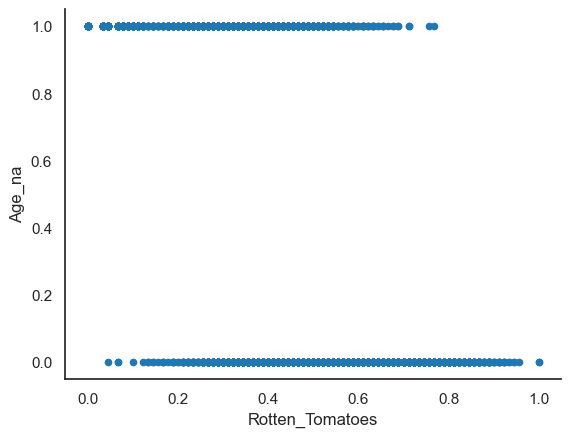

In [44]:
#split dataset in features and target variable
#feature_cols = ['Year', 'IMDb', 'Rotten_Tomatoes', 'Netflix','Hulu','Prime Video','Disney+']
#X = X_train[feature_cols] # Features
#y = y_train # Target variable

tabelle = X_train[['Rotten_Tomatoes']]
tabelle = tabelle.join(y_train)
tabelle.head()
tabelle.plot.scatter('Rotten_Tomatoes','Age_na')
sns.despine()

## Logistische Regression

In [45]:
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train, y_train)

/Users/silyr/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty=None)

In [46]:
#ke ahnig wasmer hie mache aber it's worth trying
logreg = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
logreg.fit(tabelle['Rotten_Tomatoes'].values.reshape(-1,1), tabelle['Age_na'])
print(logreg.intercept_, logreg.coef_)

[3.68168351] [[-10.38350785]]


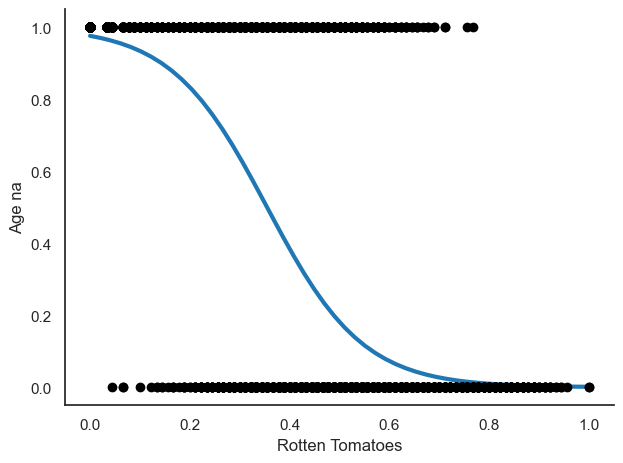

In [47]:
x = tabelle['Rotten_Tomatoes']
y = tabelle['Age_na']


def plot_log_reg(x, y, logreg, xmin=None, xmax=None, alpha=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    ax.scatter(x, y, color='black', zorder=20, alpha=alpha)
    if xmin is None:
        xmin = x.min()
    if xmax is None:
        xmax = x.max()
    X_test = np.linspace(xmin, xmax)

    loss = scipy.special.expit(X_test * logreg.coef_ + logreg.intercept_).ravel()
    ax.plot(X_test, loss, linewidth=3)

    ax.set_xlabel('Rotten Tomatoes')
    ax.set_ylabel('Age na')
    fig.tight_layout()
    sns.despine()
    return fig, ax


plot_log_reg(x, y, logreg, xmin=0, xmax=1);

## Interpretation der logistischen Regression
Die logistische Regression zeigt, dass eine schlechtere Bewertung auf Rotten-Tomatoes, darauf hinweisen kann, dass keine Altersangabe angegeben ist im Datensatz. Jedoch kann man an den beiden Variabelnverteilungen oben und unten erkennen, dass bei einer Bewertung zwischen 0.2-0.7 die Vorhersage wird. Dies weil es TV-Shows mit und ohne Altersbeschränkungsangaben hat.

## Model Development and Prediction

In [68]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/Users/silyr/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic Regression from Statistics Packages

In [43]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.399141
         Iterations 7
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.407    
Dependent Variable:  Age_na            AIC:               3441.8243
Date:                2023-05-11 14:27  BIC:               3486.3791
No. Observations:    4294              Log-Likelihood:    -1713.9  
Df Model:            6                 LL-Null:           -2891.3  
Df Residuals:        4287              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      7.0000                                        
-------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------
Year             -2.0891   0.5152  -4.0553 0.0001  -3.0988  -1.0794
IMDb              5.0524   0.2627  19.229

## Logistic Regression with Scikit Learn

In [48]:
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train, y_train)

/Users/silyr/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty=None)

## Prediction

Vorhersage der Alterangabe (1/0)

In [49]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1])

Vorhersage der Wahrscheinlichkeit von Altersangabe (1/0)

In [69]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.02273865, 0.97726135],
       [0.80475106, 0.19524894],
       [0.03198838, 0.96801162],
       ...,
       [0.60101509, 0.39898491],
       [0.87382381, 0.12617619],
       [0.04187686, 0.95812314]])

## Model Evaluation

### Confusion Matrix test

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[569  99]
 [108 298]]


#### Interpretation
Der komplette Testdatensatz hat 1074 TV-Shows, davon wurden 569 Daten mit Altersangabe angegeben zusätzlich war bei 99 Daten die positive Angabe falsch war. Bei 298 Daten wurde keine Altersangabe vorausgesagt und die Angabe war richtig, bei 108 TV-Shows war die Angabe falsch

### Accuracy Score

In [70]:
metrics.accuracy_score(y_test, y_pred)

0.8035381750465549

Die Accuracy-Score von 0.8 ist in dem guten Spektrum, mit der Annahme, das bei ca. 60% der Daten die Alterangabe vorhanden war. dies lässt bereits eine bessere Vorhersage zu.

Ein Model mit einer Accuracy-Score zwischen 0.8-0.9 ist wünschenswert, damit lässt dieses Model eine gute Vorhersage zu.

### Precision and Recall

In [71]:
metrics.precision_score(y_test,y_pred)

0.751937984496124

In [72]:
metrics.recall_score(y_test,y_pred)

0.7167487684729064

### F1-Score

In [73]:
metrics.f1_score(y_test, y_pred)

0.7339218158890289

### Area Under the Curve

In [74]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.7865180968113035

## Accuracy train

nun wird train auf seine Accuracy und Predictability geprüft.

In [77]:
y_pred = logreg.predict(X_train)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [78]:
confusion_matrix = metrics.confusion_matrix(y_train, y_pred)
print(confusion_matrix)

[[2256  317]
 [ 518 1203]]


Der Datensatz hat 4294 TV-Shows bei der richtigen positiven Vorhersage für 2256 und 317 die falsch positiv angegeben wurden und keine Altersangabe hat auch eine ziemlich gute Vorhersage.

In [79]:
metrics.accuracy_score(y_train, y_pred)

0.8055426176059618

Die Accuracy-Score ist verglichen mit dem Test-Set sehr gut, damit kann eine gute Vorhersage getroffen werden.

In [64]:
metrics.precision_score(y_train,y_pred)

0.7832480818414322

In [65]:
metrics.precision_score(y_train,y_pred)

0.7832480818414322

In [66]:
metrics.recall_score(y_train,y_pred)

0.7117954677513074